In [1]:
#import packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_defect = pd.read_csv('/content/wine.csv')

df_defect.head

<bound method NDFrame.head of      Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0       1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1       1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2       1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3       1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4       1    13.24        2.59  2.87  21.0  118     2.80        2.69   
..    ...      ...         ...   ...   ...  ...      ...         ...   
173     3    13.71        5.65  2.45  20.5   95     1.68        0.61   
174     3    13.40        3.91  2.48  23.0  102     1.80        0.75   
175     3    13.27        4.28  2.26  20.0  120     1.59        0.69   
176     3    13.17        2.59  2.37  20.0  120     1.65        0.68   
177     3    14.13        4.10  2.74  24.5   96     2.05        0.76   

     Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                    0.28     2.29  

In [3]:
df_defect.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
X = df_defect.drop(['Wine'], axis=1)
y = df_defect['Wine']

print(X.shape, y.shape)

(178, 13) (178,)


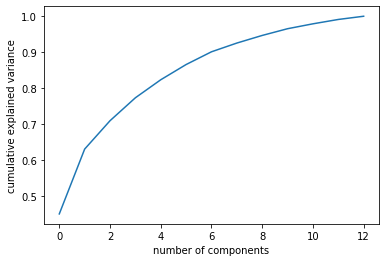

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.decomposition import PCA

pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

accum_explained_var = np.cumsum(pca.explained_variance_ratio_)

min_threshold = np.argmax(accum_explained_var > 0.90) # use 90%

In [7]:
min_threshold

6

In [8]:
pca = PCA(n_components = min_threshold + 1)

X_train_projected= pca.fit_transform(X_train)
X_test_projected = pca.transform(X_test)

X_train_projected.shape

(142, 7)

In [9]:
# Train the model

# Train the model
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

# Logistic Regression

# without PCA
logregwithoutpca = LogisticRegression()
logregwithoutpca.fit(X_train, y_train)

logregwithoutpca_result = logregwithoutpca.predict(X_test)

print('Accuracy of Logistic Regression (without PCA) on training set: {:.2f}'
     .format(logregwithoutpca.score(X_train, y_train)))
print('Accuracy of Logistic Regression (without PCA)  on testing set: {:.2f}'
     .format(logregwithoutpca.score(X_test, y_test)))
print('\nConfusion matrix :\n',confusion_matrix(y_test, logregwithoutpca_result))
print('\n\nClassification report :\n\n', classification_report(y_test, logregwithoutpca_result))


Accuracy of Logistic Regression (without PCA) on training set: 0.99
Accuracy of Logistic Regression (without PCA)  on testing set: 1.00

Confusion matrix :
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


Classification report :

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [10]:
#with PCA
logregwithpca = LogisticRegression()
logregwithpca.fit(X_train_projected, y_train)

logregwithpca_result = logregwithpca.predict(X_test_projected)

print('Accuracy of Logistic Regression (with PCA) on training set: {:.2f}'
     .format(logregwithpca.score(X_train_projected, y_train)))
print('Accuracy of Logistic Regression (with PCA) on testing set: {:.2f}'
     .format(logregwithpca.score(X_test_projected, y_test)))
print('\nConfusion matrix :\n',confusion_matrix(y_test, logregwithpca_result))
print('\n\nClassification report :\n\n', classification_report(y_test, logregwithpca_result))

Accuracy of Logistic Regression (with PCA) on training set: 0.99
Accuracy of Logistic Regression (with PCA) on testing set: 1.00

Confusion matrix :
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


Classification report :

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

